In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load the data
df = pd.read_csv('usd_exchange_rates.csv')
df['date'] = pd.to_datetime(df['TIME_PERIOD'])
df['value'] = df['OBS_VALUE'].astype(float)
df = df.sort_values('date').reset_index(drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6719 entries, 0 to 6718
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TIME_PERIOD  6719 non-null   object        
 1   OBS_VALUE    6719 non-null   float64       
 2   OBS_STATUS   6719 non-null   object        
 3   OBS_CONF     6719 non-null   object        
 4   date         6719 non-null   datetime64[ns]
 5   value        6719 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 315.1+ KB


<Axes: title={'center': 'Exchange Rate Over Time'}>

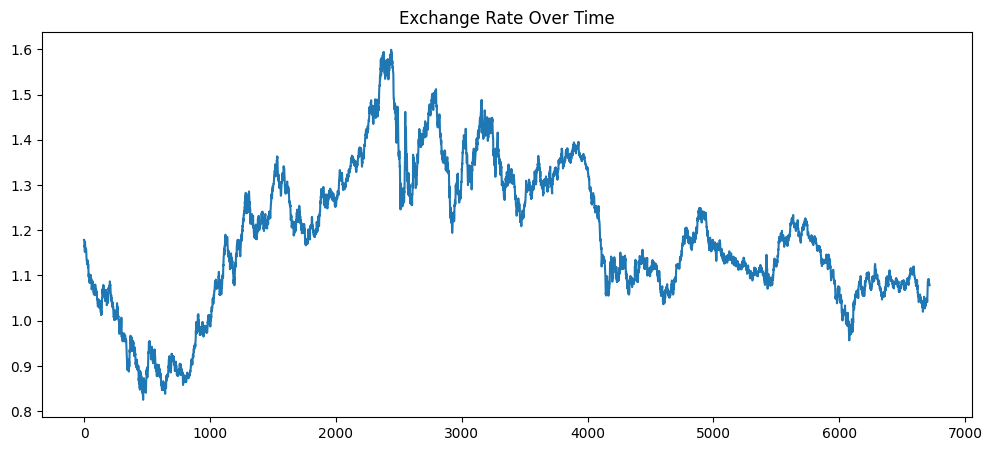

In [19]:
df['value'].plot(figsize=(12, 5), title='Exchange Rate Over Time')

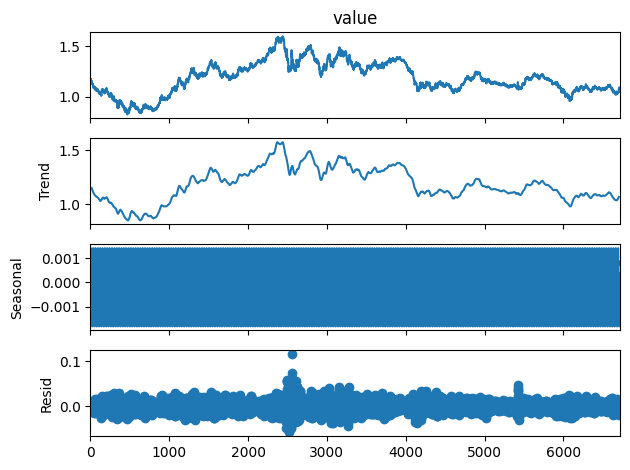

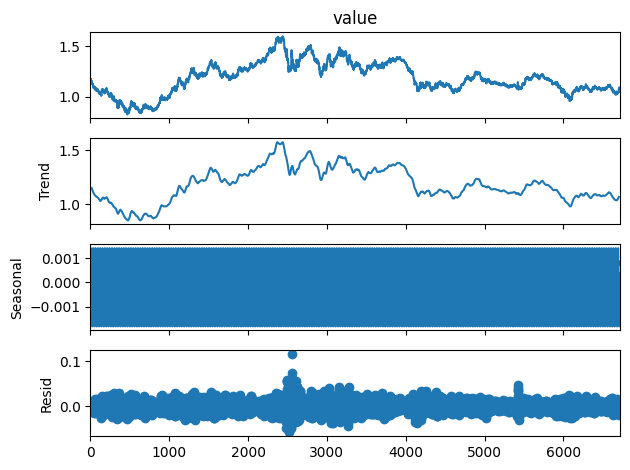

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['value'], model='additive', period=30)  # change period based on suspected seasonality
result.plot()

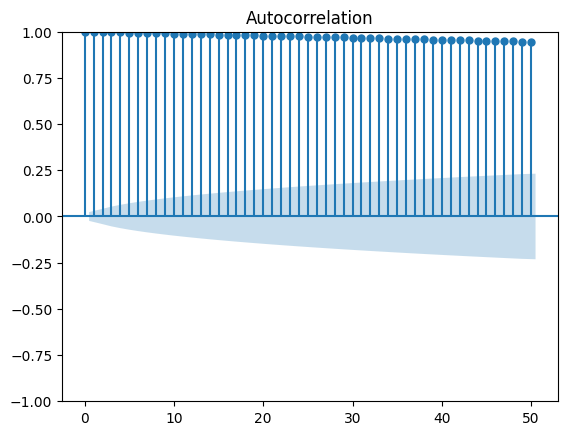

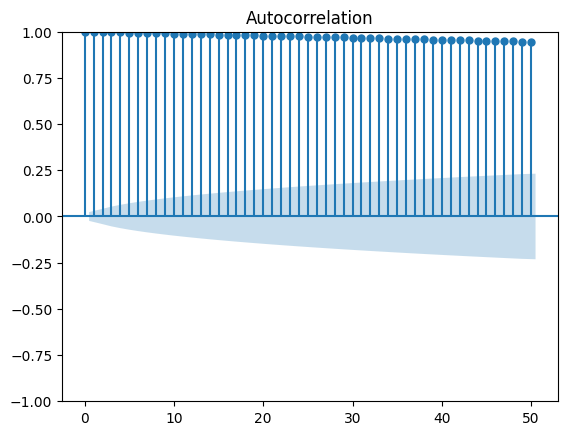

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['value'], lags=50)

Text(0, 0.5, 'Power')

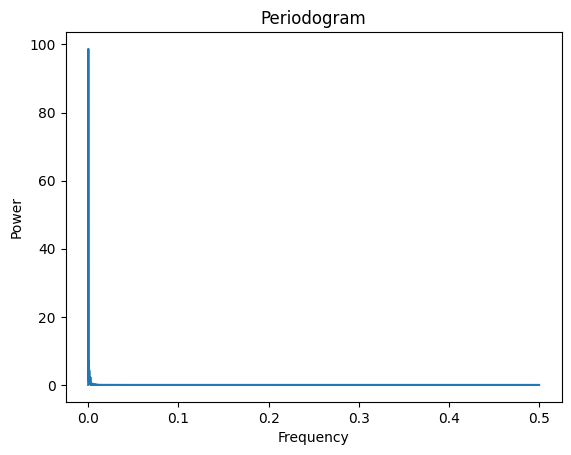

In [22]:
from scipy.signal import periodogram

freqs, psd = periodogram(df['value'].dropna())
plt.plot(freqs, psd)
plt.title('Periodogram')
plt.xlabel('Frequency')
plt.ylabel('Power')

In [23]:
df.head()

,TIME_PERIOD,OBS_VALUE,OBS_STATUS,OBS_CONF,date,value
0,1/4/1999,1.1789,A,F,1999-01-04,1.1789
1,1/5/1999,1.1790,A,F,1999-01-05,1.1790
2,1/6/1999,1.1743,A,F,1999-01-06,1.1743
3,1/7/1999,1.1632,A,F,1999-01-07,1.1632
4,1/8/1999,1.1659,A,F,1999-01-08,1.1659


In [3]:
df.describe()

,OBS_VALUE,date,value
count,6719.000000,6719,6719.000000
mean,1.183110,2012-02-13 12:06:06.483107584,1.183110
min,0.825200,1999-01-04 00:00:00,0.825200
25%,1.082600,2005-07-23 12:00:00,1.082600
50%,1.172600,2012-02-09 00:00:00,1.172600
75%,1.300750,2018-09-05 12:00:00,1.300750
max,1.599000,2025-03-27 00:00:00,1.599000
std,0.155158,NaN,0.155158


C:\Users\alius\AppData\Local\Temp\ipykernel_2428\2071129739.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


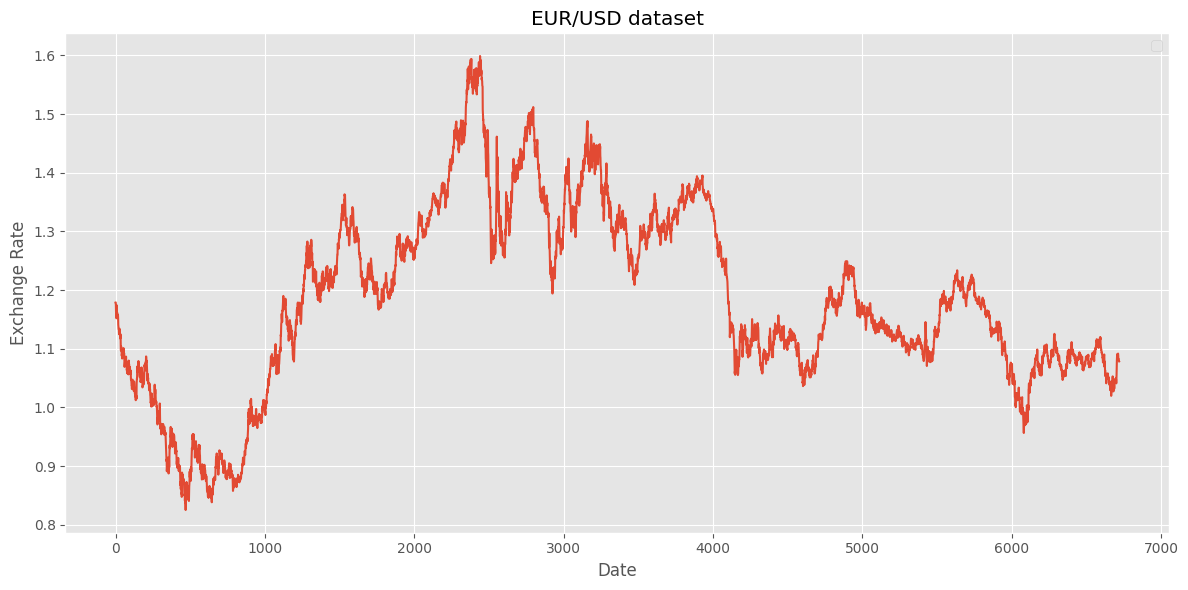

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'])
plt.title('EUR/USD dataset')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Summary statistics
df['value'].describe()

count    6719.000000
mean        1.183110
std         0.155158
min         0.825200
25%         1.082600
50%         1.172600
75%         1.300750
max         1.599000
Name: value, dtype: float64

In [20]:
# Stationarity tests
from statsmodels.tsa.stattools import adfuller, kpss

adf_result_eur = adfuller(df['value'])
adf_stat_eur, adf_pvalue_eur = adf_result_eur[0], adf_result_eur[1]

adf_pvalue_eur

0.38163754611334433

In [21]:
adf_stat_eur

-1.7976328570008804

In [24]:
kpss_result_eur = kpss(df['value'], regression='c', nlags="auto")
kpss_stat_eur, kpss_pvalue_eur = kpss_result_eur[0], kpss_result_eur[1]

print(kpss_stat_eur)
print(kpss_pvalue_eur)

2.2057166266712573
0.01


C:\Users\alius\AppData\Local\Temp\ipykernel_2428\4244875104.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result_eur = kpss(df['value'], regression='c', nlags="auto")


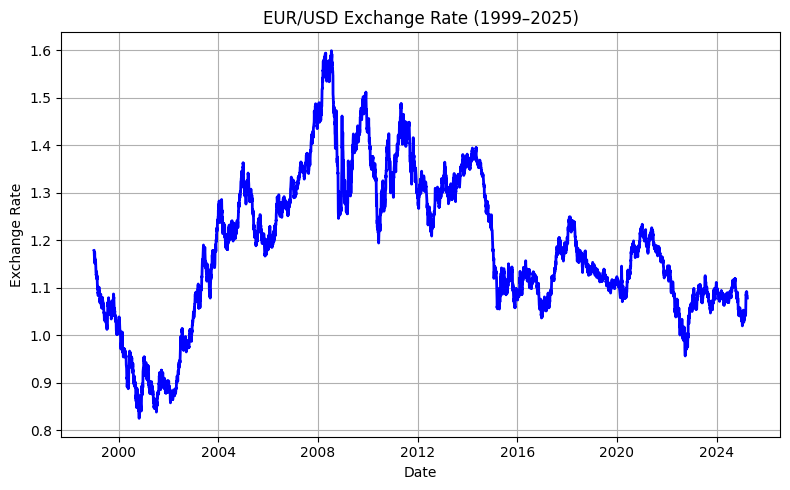

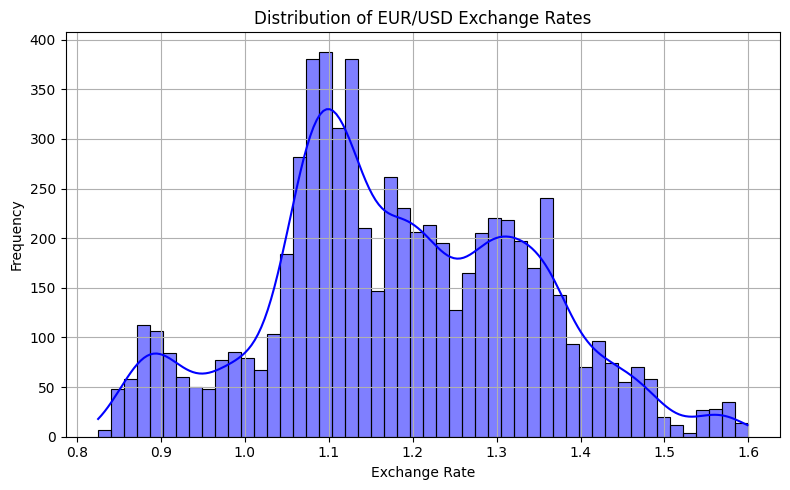

In [7]:
# Plot time series
plt.figure(figsize=(8, 5))
plt.plot(df['date'], df['value'], color='blue', linewidth=2)
plt.title('EUR/USD Exchange Rate (1999–2025)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.tight_layout()

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['value'], bins=50, kde=True, color='blue')
plt.title('Distribution of EUR/USD Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
